In [145]:
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats 
import psycopg2 # needed to get database exception errors when uploading dataframe


In [146]:
all_death_workforce = pd.read_excel('Heart data/All deaths at working age.xlsx')

In [147]:
all_death_workforce.head()

,country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,NaN
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,NaN,NaN,NaN,NaN,NaN
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,NaN
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,NaN
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0


In [148]:
all_death_workforce.rename(columns={'2013': 'death_work_13', '2014': 'death_work_14','2015': 'death_work_15', 
                                      '2016':'death_work_16', '2017': 'death_work_17', '2018': 'death_work_18','2019': 'death_work_19', 
                                      '2020': 'death_work_20', '2021': 'death_work_21', '2022': 'death_work_22'}, inplace=True)

In [149]:
all_death_workforce.head()

,country,death_work_13,death_work_14,death_work_15,death_work_16,death_work_17,death_work_18,death_work_19,death_work_20,death_work_21,death_work_22
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,NaN
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,NaN,NaN,NaN,NaN,NaN
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,NaN
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,NaN
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0


In [150]:
all_death_workforce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        37 non-null     object 
 1   death_work_13  36 non-null     float64
 2   death_work_14  36 non-null     float64
 3   death_work_15  36 non-null     float64
 4   death_work_16  36 non-null     float64
 5   death_work_17  36 non-null     float64
 6   death_work_18  36 non-null     float64
 7   death_work_19  34 non-null     float64
 8   death_work_20  34 non-null     float64
 9   death_work_21  34 non-null     float64
 10  death_work_22  10 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.3+ KB


In [151]:
# Separate numeric and non-numeric columns
numeric_cols = all_death_workforce.select_dtypes(include=[np.number]).columns
non_numeric_cols = all_death_workforce.select_dtypes(exclude=[np.number]).columns


In [152]:
all_death_workforce[numeric_cols] = all_death_workforce[numeric_cols].fillna(all_death_workforce[numeric_cols].mean())

In [153]:
# Round all numeric columns to one decimal place
all_death_workforce = all_death_workforce.round(1)

In [154]:
all_death_workforce

,country,death_work_13,death_work_14,death_work_15,death_work_16,death_work_17,death_work_18,death_work_19,death_work_20,death_work_21,death_work_22
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,277.5
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,694.3,667.1,665.3,699.3,277.5
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,277.5
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,277.5
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0
5,Denmark,93.0,104.0,118.0,136.0,119.0,77.0,110.0,119.0,116.0,277.5
6,Germany,1585.0,1554.0,1584.0,1457.0,1435.0,1432.0,1359.0,1388.0,1365.0,277.5
7,Estonia,62.0,66.0,36.0,54.0,39.0,19.0,31.0,28.0,32.0,277.5
8,Ireland,138.0,148.0,108.0,100.0,90.0,97.0,89.0,90.0,114.0,277.5
9,Greece,263.0,255.0,250.0,238.0,225.0,235.0,221.0,209.0,222.0,277.5


In [ ]:
# Round the numbers to 2 decimal places and remove trailing zeros
#all_death_workforce.astype(str).applymap(lambda x: x.rstrip('0').rstrip('.') if '.' in x else x)


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

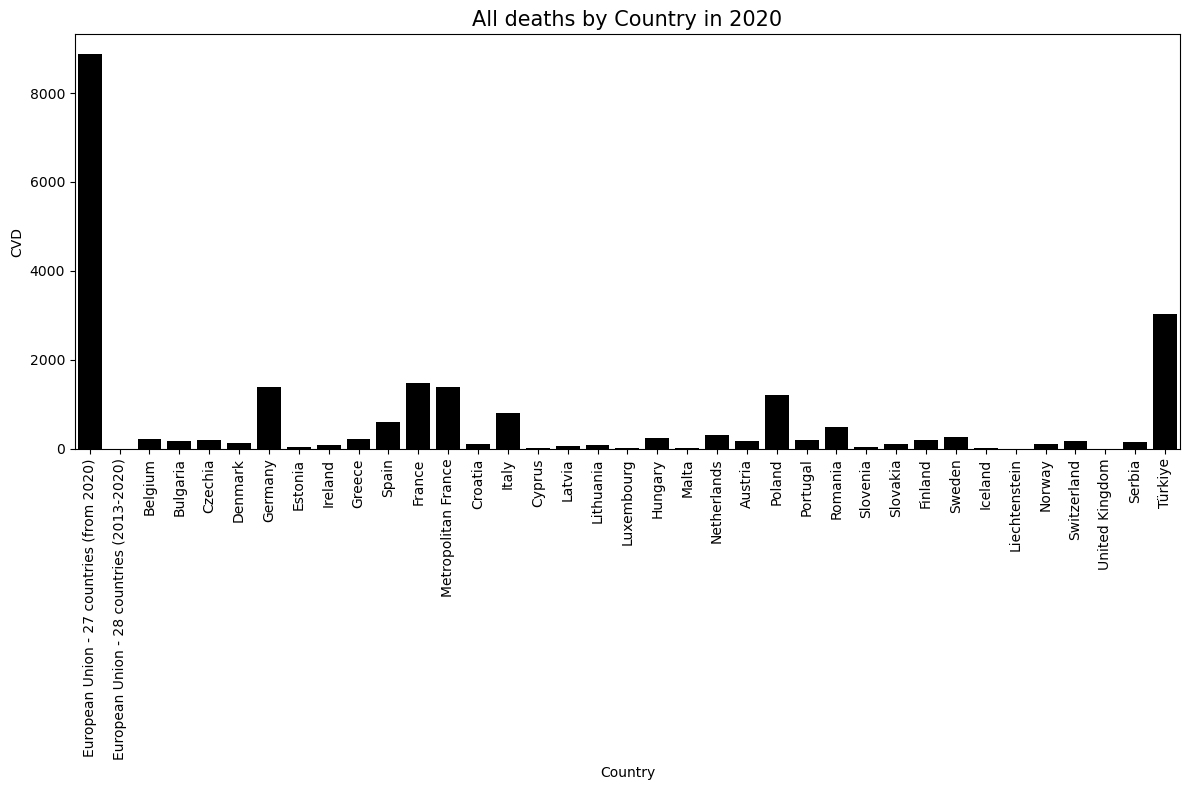

In [ ]:
plt.figure(figsize=(12,8))

death_countries = sns.barplot(data= all_death_workforce, x= 'country', y= 'death_work_20', color= 'black')

#mean_death = all_death_workforce['death_work_20'].mean

#death_countries.axhline(mean_death, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

death_countries.set_title('All deaths by Country in 2020', fontsize=15)
death_countries.set_xlabel('Country', fontsize= 10)
death_countries.set_ylabel( 'CVD', fontsize=10)

plt.xticks(rotation= 90)

plt.tight_layout()
plt.show

In [ ]:
cvd_work = pd.read_excel('Heart data/CVD due to work.xlsx')

In [ ]:
cvd_work.rename(columns={'TIME': 'country', '2020':'cvd_20'}, inplace=True)

In [ ]:
cvd_work.head()

,country,cvd_20
0,European Union - 27 countries (from 2020),0.5
1,European Union - 28 countries (2013-2020),NaN
2,Euro area - 19 countries (2015-2022),0.2
3,Belgium,0.3
4,Bulgaria,1.4


In [ ]:
cvd_work_sorted = cvd_work.sort_values(by='cvd_20')

In [ ]:
# Separate numeric and non-numeric columns
numeric_cols = cvd_work_sorted.select_dtypes(include=[np.number]).columns
non_numeric_cols = cvd_work_sorted.select_dtypes(exclude=[np.number]).columns

#fill null value
cvd_work_sorted[numeric_cols] = cvd_work_sorted[numeric_cols].fillna(cvd_work_sorted[numeric_cols].mean())


# Round all numeric columns to one decimal place
cvd_work_sorted = cvd_work_sorted.round(1)


In [ ]:
cvd_work_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 5 to 34
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  35 non-null     object 
 1   cvd_20   35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 840.0+ bytes


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

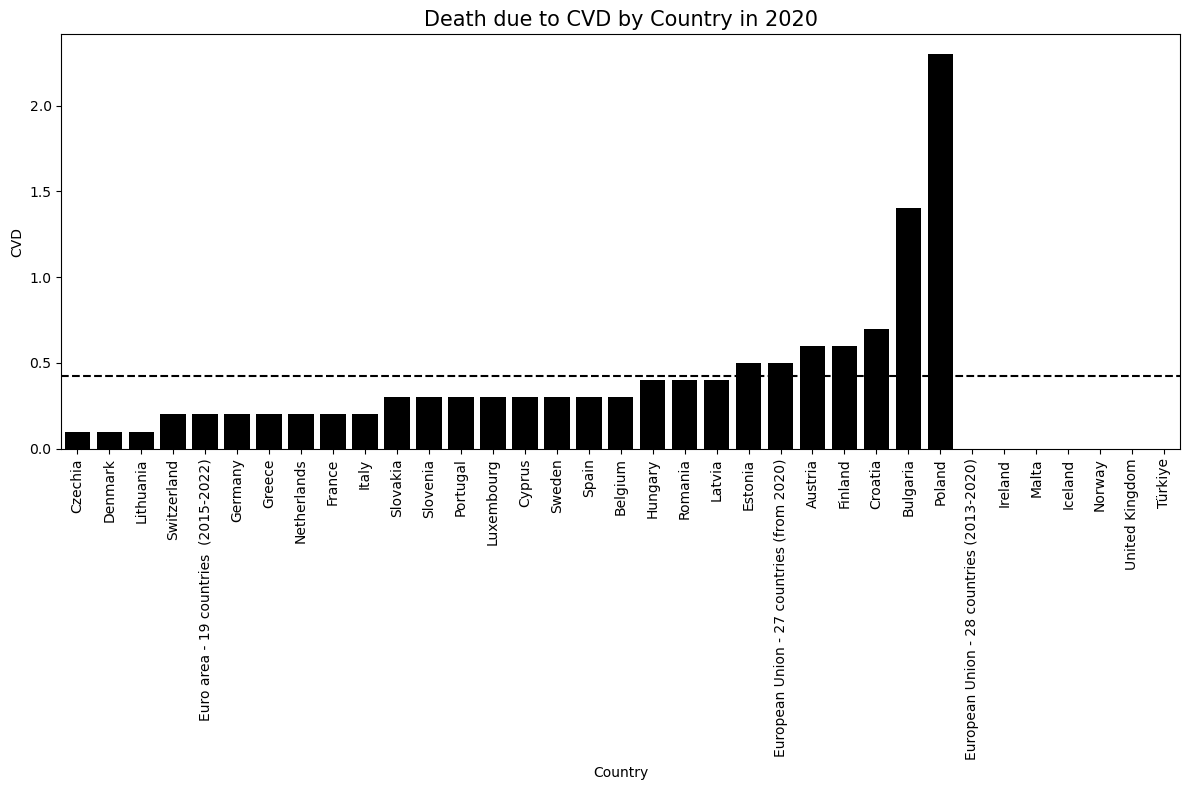

In [ ]:
plt.figure(figsize=(12,8))

cvd_countries = sns.barplot(data= cvd_work_sorted, x= 'country', y= 'cvd_20', color= 'black')

mean_cvd = cvd_work['cvd_20'].mean() 

cvd_countries.axhline(mean_cvd, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

cvd_countries.set_title('Death due to CVD by Country in 2020', fontsize=15)
cvd_countries.set_xlabel('Country', fontsize= 10)
cvd_countries.set_ylabel( 'CVD', fontsize=10)

plt.xticks(rotation= 90)

plt.tight_layout()
plt.show

In [ ]:
death_other_heart_diseases = pd.read_excel('Heart data/Death by other heart diseases.xlsx')

In [ ]:
death_other_heart_diseases.rename(columns={'2012': 'other_12', '2013': 'other_13', '2014': 'other_14','2015': 'other_15', 
                                      '2016':'other_16', '2017': 'other_17', '2018': 'other_18','2019': 'other_19', 
                                      '2020': 'other_20', '2021': 'other_21'}, inplace=True)


In [ ]:
death_other_heart_diseases.head()

,country,other_12,other_13,other_14,other_15,other_16,other_17,other_18,other_19,other_20,other_21
0,Belgium,18.64,18.46,16.66,16.07,16.88,17.33,11.33,11.45,11.38,11.87
1,Bulgaria,107.74,116.91,127.89,115.11,135.01,133.17,135.75,124.77,124.88,132.79
2,Czechia,25.86,21.04,21.70,23.47,25.71,27.75,26.48,25.67,25.55,27.93
3,Denmark,12.37,12.14,13.83,12.18,13.22,14.58,13.78,11.05,9.42,10.10
4,Germany,18.03,17.76,17.65,19.09,16.88,15.29,15.21,12.98,12.39,13.05


In [ ]:
death_other_heart_diseases.isnull().sum()

country     0
other_12    0
other_13    0
other_14    0
other_15    0
other_16    0
other_17    0
other_18    0
other_19    0
other_20    0
other_21    0
dtype: int64

In [ ]:
expenses_healthcare = pd.read_excel('Heart data/Expenditure in healthcare.xlsx') 

In [ ]:
expenses_healthcare.rename(columns={'TIME': 'country', '2012': 'exp_12', '2013': 'exp_13', '2014': 'exp_14','2015': 'exp_15', 
                                      '2016':'exp_16', '2017': 'exp_17', '2018': 'exp_18','2019': 'exp_19', 
                                      '2020': 'exp_20', '2021': 'exp_21', '2022': 'exp_22', '2023':'exp_23'}, inplace=True)

In [ ]:
expenses_healthcare.head()

,country,exp_12,exp_13,exp_14,exp_15,exp_16,exp_17,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23
0,European Union - 27 countries (from 2020),NaN,NaN,180885.50,186125.51,193175.30,208001.81,217206.33,227159.57,243002.47,255332.48,NaN,NaN
1,Euro area – 20 countries (from 2023),NaN,NaN,158678.69,163200.99,169471.14,183186.60,191992.27,201151.96,215198.64,225637.74,NaN,NaN
2,Euro area - 19 countries (2015-2022),NaN,NaN,158589.44,163103.02,169372.15,183084.66,191882.62,201033.40,215082.57,225512.79,NaN,NaN
3,Belgium,8460.02,8852.82,9338.09,10334.36,11289.13,11831.11,12477.06,11964.11,11244.63,11897.60,NaN,NaN
4,Bulgaria,2.75,3.32,3.58,4.39,3.34,3.59,4.26,5.32,110.15,196.77,283.48,NaN


In [ ]:
# Separate numeric and non-numeric columns
numeric_cols = expenses_healthcare.select_dtypes(include=[np.number]).columns
non_numeric_cols = expenses_healthcare.select_dtypes(exclude=[np.number]).columns

#fill null value
expenses_healthcare[numeric_cols] = expenses_healthcare[numeric_cols].fillna(expenses_healthcare[numeric_cols].mean())


# Round all numeric columns to one decimal place
expenses_healthcare = expenses_healthcare.round(1)


In [ ]:
expenses_healthcare.info()

In [ ]:
death_ischaemic = pd.read_excel('Heart data/Death by ischaemic heart.xlsx')

In [ ]:
death_ischaemic.rename(columns={'2012': 'isch_12', '2013': 'isch_13', '2014': 'isch_14','2015': 'isch_15', 
                                      '2016':'isch_16', '2017': 'isch_17', '2018': 'isch_18','2019': 'isch_19', 
                                      '2020': 'isch_20', '2021': 'isch_21'}, inplace=True)


In [ ]:
death_ischaemic.head()

,country,isch_12,isch_13,isch_14,isch_15,isch_16,isch_17,isch_18,isch_19,isch_20,isch_21
0,Belgium,25.91,25.33,23.62,23.67,21.34,20.91,20.68,19.02,17.74,17.94
1,Bulgaria,82.84,76.19,79.70,77.36,76.47,78.32,77.16,76.88,90.63,95.52
2,Czechia,69.01,70.49,62.98,60.09,53.99,53.84,53.67,50.34,49.64,49.65
3,Denmark,23.70,22.11,21.45,20.68,20.51,19.22,18.47,18.84,18.28,17.79
4,Germany,37.94,36.78,34.62,35.42,33.65,32.54,32.06,30.24,30.88,30.71


In [ ]:
death_ischaemic.info()

In [ ]:
death_other_ischaemic = pd.read_excel('Heart data/Death by other ischaemic diseases.xlsx')

In [ ]:
death_other_ischaemic.rename(columns={'2012': 'other_isch_12', '2013': 'other_isch_13', '2014': 'other_isch_14','2015': 'other_isch_15', 
                                      '2016':'other_isch_16', '2017': 'other_isch_17', '2018': 'other_isch_18','2019': 'other_isch_19', 
                                      '2020': 'other_isch_20', '2021': 'other_isch_21'}, inplace=True)


In [ ]:
death_other_ischaemic.head()

,country,other_isch_12,other_isch_13,other_isch_14,other_isch_15,other_isch_16,other_isch_17,other_isch_18,other_isch_19,other_isch_20,other_isch_21
0,Belgium,6.32,6.38,6.15,6.75,5.64,5.55,6.16,5.83,5.33,5.60
1,Bulgaria,30.91,29.35,28.15,29.10,27.88,32.90,29.11,30.01,36.25,37.56
2,Czechia,37.85,42.16,39.32,38.37,34.01,34.10,35.99,33.38,32.71,32.68
3,Denmark,9.64,10.45,10.78,9.79,9.75,9.45,7.83,8.96,9.35,9.23
4,Germany,12.22,11.85,11.60,12.45,11.61,11.65,11.53,11.26,11.09,10.97


In [ ]:
death_other_ischaemic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        34 non-null     object 
 1   other_isch_12  34 non-null     float64
 2   other_isch_13  34 non-null     float64
 3   other_isch_14  34 non-null     float64
 4   other_isch_15  34 non-null     float64
 5   other_isch_16  34 non-null     float64
 6   other_isch_17  34 non-null     float64
 7   other_isch_18  34 non-null     float64
 8   other_isch_19  34 non-null     float64
 9   other_isch_20  34 non-null     float64
 10  other_isch_21  34 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.0+ KB


In [ ]:
all_heart = cvd_work.merge(death_ischaemic, on= 'country', how= 'outer').merge(death_other_ischaemic, on='country', how='outer').merge(death_other_heart_diseases, on='country', how='outer').merge(all_death_workforce, on='country', how='outer')

In [131]:
all_heart.merge(all_death_workforce, on='country', how='outer').merge(cvd_work, on='country', how='outer')

,country,cvd_20_x,isch_12,isch_13,isch_14,isch_15,isch_16,isch_17,isch_18,isch_19,...,death_work_14_y,death_work_15_y,death_work_16_y,death_work_17_y,death_work_18_y,death_work_19_y,death_work_20_y,death_work_21_y,death_work_22_y,cvd_20_y
0,European Union - 27 countries (from 2020),0.5,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,NaN,0.5
1,European Union - 28 countries (2013-2020),0.4,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,11807.0,11742.0,11034.0,10822.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Euro area - 19 countries (2015-2022),0.2,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
3,Belgium,0.3,25.9,25.3,23.6,23.7,21.3,20.9,20.7,19.0,...,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,NaN,0.3
4,Bulgaria,1.4,82.8,76.2,79.7,77.4,76.5,78.3,77.2,76.9,...,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,NaN,1.4
5,Czechia,0.1,69.0,70.5,63.0,60.1,54.0,53.8,53.7,50.3,...,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0,0.1
6,Denmark,0.1,23.7,22.1,21.4,20.7,20.5,19.2,18.5,18.8,...,104.0,118.0,136.0,119.0,77.0,110.0,119.0,116.0,NaN,0.1
7,Germany,0.2,37.9,36.8,34.6,35.4,33.6,32.5,32.1,30.2,...,1554.0,1584.0,1457.0,1435.0,1432.0,1359.0,1388.0,1365.0,NaN,0.2
8,Estonia,0.5,87.7,80.0,79.0,65.6,69.7,67.4,62.0,47.0,...,66.0,36.0,54.0,39.0,19.0,31.0,28.0,32.0,NaN,0.5
9,Ireland,0.4,43.1,39.7,41.0,39.6,36.6,32.7,33.9,34.0,...,148.0,108.0,100.0,90.0,97.0,89.0,90.0,114.0,NaN,NaN


In [108]:
# Separate numeric and non-numeric columns
numeric_cols = all_heart.select_dtypes(include=[np.number]).columns
non_numeric_cols = all_heart.select_dtypes(exclude=[np.number]).columns

#fill null value
all_heart[numeric_cols] = all_heart[numeric_cols].fillna(all_heart[numeric_cols].mean())


# Round all numeric columns to one decimal place
all_heart = all_heart.round(1)


In [132]:
all_heart.shape

(38, 42)

In [133]:
all_heart.isnull().sum()

country          0
cvd_20           0
isch_12          0
isch_13          0
isch_14          0
isch_15          0
isch_16          0
isch_17          0
isch_18          0
isch_19          0
isch_20          0
isch_21          0
other_isch_12    0
other_isch_13    0
other_isch_14    0
other_isch_15    0
other_isch_16    0
other_isch_17    0
other_isch_18    0
other_isch_19    0
other_isch_20    0
other_isch_21    0
other_12         0
other_13         0
other_14         0
other_15         0
other_16         0
other_17         0
other_18         0
other_19         0
other_20         0
other_21         0
death_work_13    0
death_work_14    0
death_work_15    0
death_work_16    0
death_work_17    0
death_work_18    0
death_work_19    0
death_work_20    0
death_work_21    0
death_work_22    0
dtype: int64

In [134]:
all_heart

,country,cvd_20,isch_12,isch_13,isch_14,isch_15,isch_16,isch_17,isch_18,isch_19,...,death_work_13,death_work_14,death_work_15,death_work_16,death_work_17,death_work_18,death_work_19,death_work_20,death_work_21,death_work_22
0,European Union - 27 countries (from 2020),0.5,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,11135.0,10346.0,10231.0,9575.0,9405.0,9207.0,8981.0,8877.0,9272.0,277.5
1,European Union - 28 countries (2013-2020),0.4,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,12513.0,11807.0,11742.0,11034.0,10822.0,694.3,667.1,665.3,699.3,277.5
2,Euro area - 19 countries (2015-2022),0.2,55.5,52.1,50.7,50.1,47.7,46.7,44.8,41.8,...,1139.8,1078.5,1064.6,1021.2,1002.7,694.3,667.1,665.3,699.3,277.5
3,Belgium,0.3,25.9,25.3,23.6,23.7,21.3,20.9,20.7,19.0,...,312.0,295.0,299.0,266.0,251.0,246.0,231.0,225.0,231.0,277.5
4,Bulgaria,1.4,82.8,76.2,79.7,77.4,76.5,78.3,77.2,76.9,...,282.0,244.0,234.0,209.0,183.0,168.0,174.0,180.0,226.0,277.5
5,Czechia,0.1,69.0,70.5,63.0,60.1,54.0,53.8,53.7,50.3,...,345.0,289.0,303.0,276.0,268.0,273.0,260.0,205.0,215.0,263.0
6,Denmark,0.1,23.7,22.1,21.4,20.7,20.5,19.2,18.5,18.8,...,93.0,104.0,118.0,136.0,119.0,77.0,110.0,119.0,116.0,277.5
7,Germany,0.2,37.9,36.8,34.6,35.4,33.6,32.5,32.1,30.2,...,1585.0,1554.0,1584.0,1457.0,1435.0,1432.0,1359.0,1388.0,1365.0,277.5
8,Estonia,0.5,87.7,80.0,79.0,65.6,69.7,67.4,62.0,47.0,...,62.0,66.0,36.0,54.0,39.0,19.0,31.0,28.0,32.0,277.5
9,Ireland,0.4,43.1,39.7,41.0,39.6,36.6,32.7,33.9,34.0,...,138.0,148.0,108.0,100.0,90.0,97.0,89.0,90.0,114.0,277.5


In [156]:
# Exclude non-numeric columns
numeric_df = all_heart.select_dtypes(include=[float, int])


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

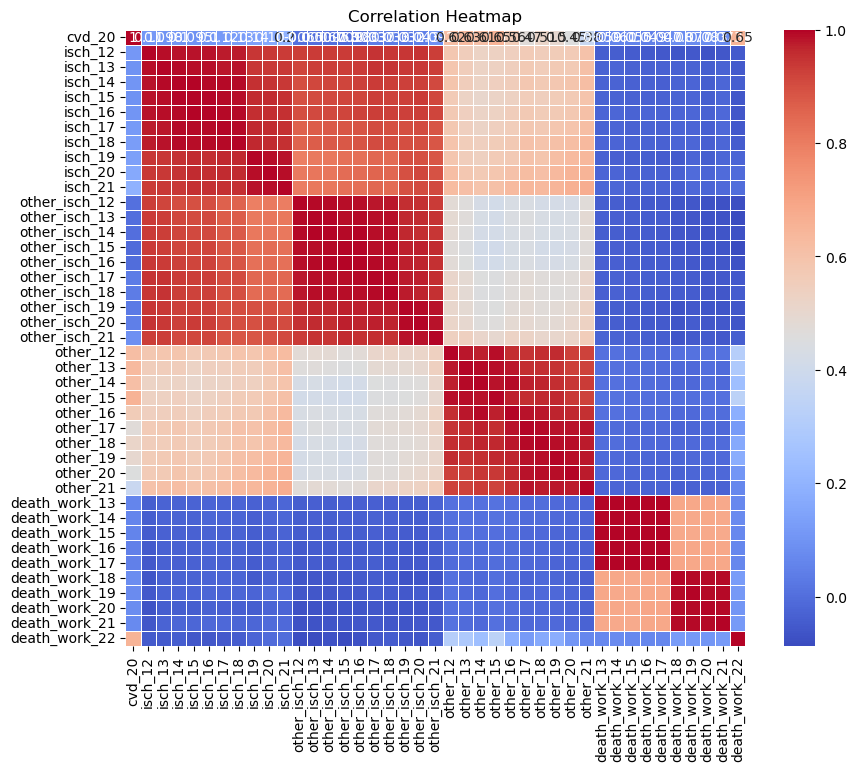

In [157]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

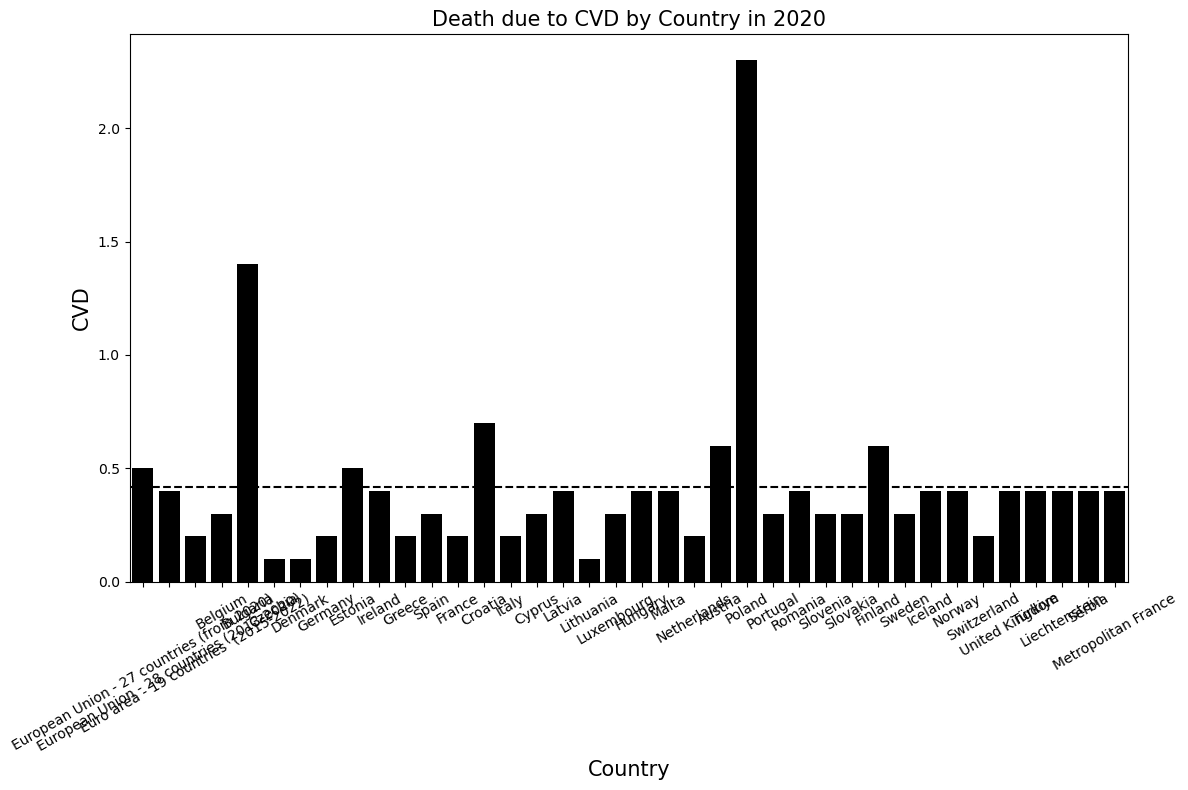

In [113]:
mean_cvd = all_heart['cvd_20'].mean()  

plt.figure(figsize=(12,8))
countries = sns.barplot(data= all_heart, x= 'country', y= 'cvd_20', color= 'black')


countries.axhline(mean_cvd, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

countries.set_title('Death due to CVD by Country in 2020', fontsize=15)
countries.set_xlabel('Country', fontsize= 15)
countries.set_ylabel( 'CVD', fontsize=15)

plt.xticks(rotation= 30)

plt.tight_layout()
plt.show

In [114]:

wlb = pd.read_csv('Data/work_life_balance.csv', delimiter= ',')

In [115]:
wlb.columns = wlb.columns.str.replace( ' ', '_').str.lower()

remote_job = wlb['remote_jobs']
remote_job = remote_job.str.replace('%', '', regex=False)
remote_job = remote_job.astype('float')
wlb['remote_jobs'] = remote_job

overwork = wlb['overworked_population']
overwork = overwork.str.replace('%', '', regex=False)
overwork = overwork.astype('float')
wlb['overworked_population'] = overwork

multi_jobs = wlb['multiple_jobholders']
multi_jobs = multi_jobs.str.replace('%', '', regex=False)
multi_jobs = multi_jobs.astype('float')
wlb['multiple_jobholders'] = multi_jobs

vacation_taken = wlb['vacations_taken_(days)']
vacation_taken = vacation_taken.replace('-', '0', regex=False)
vacation_taken = vacation_taken.astype('float')
wlb['vacations_taken_(days)'] = vacation_taken

parental_leave = wlb['paid_parental_leave_(days)']
parental_leave = parental_leave.str.replace(',', '.', regex=False)
parental_leave = parental_leave.astype('float')
wlb['paid_parental_leave_(days)'] = parental_leave

inflation_1 = wlb['inflation']
inflation_1 = inflation_1.str.replace('%', '', regex=False)
inflation_1 = inflation_1.astype('float')
wlb['inflation'] = inflation_1

wlb.drop(['2021', '2022', 'city'], axis=1, inplace=True)

In [116]:
wlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           100 non-null    object 
 1   remote_jobs                       100 non-null    float64
 2   overworked_population             100 non-null    float64
 3   minimum_vacations_offered_(days)  100 non-null    int64  
 4   vacations_taken_(days)            100 non-null    float64
 5   unemployment                      100 non-null    float64
 6   multiple_jobholders               100 non-null    float64
 7   inflation                         100 non-null    float64
 8   paid_parental_leave_(days)        100 non-null    float64
 9   covid_impact                      100 non-null    float64
 10  covid_support                     100 non-null    float64
 11  healthcare                        100 non-null    float64
 12  access_to

In [167]:
wlb_heart_2 = pd.merge(wlb, all_heart, on= 'country', how='inner')

In [168]:
wlb_heart_2['country'].value_counts()

country
Germany        9
Switzerland    3
Austria        2
Spain          2
Norway         1
Finland        1
Denmark        1
Sweden         1
Netherlands    1
France         1
Ireland        1
Belgium        1
Portugal       1
Hungary        1
Italy          1
Name: count, dtype: int64

In [169]:
wlb_heart_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           27 non-null     object 
 1   remote_jobs                       27 non-null     float64
 2   overworked_population             27 non-null     float64
 3   minimum_vacations_offered_(days)  27 non-null     int64  
 4   vacations_taken_(days)            27 non-null     float64
 5   unemployment                      27 non-null     float64
 6   multiple_jobholders               27 non-null     float64
 7   inflation                         27 non-null     float64
 8   paid_parental_leave_(days)        27 non-null     float64
 9   covid_impact                      27 non-null     float64
 10  covid_support                     27 non-null     float64
 11  healthcare                        27 non-null     float64
 12  access_to_

In [170]:
# Exclude non-numeric columns
numeric_df = wlb_heart_2.select_dtypes(include=[float, int])


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

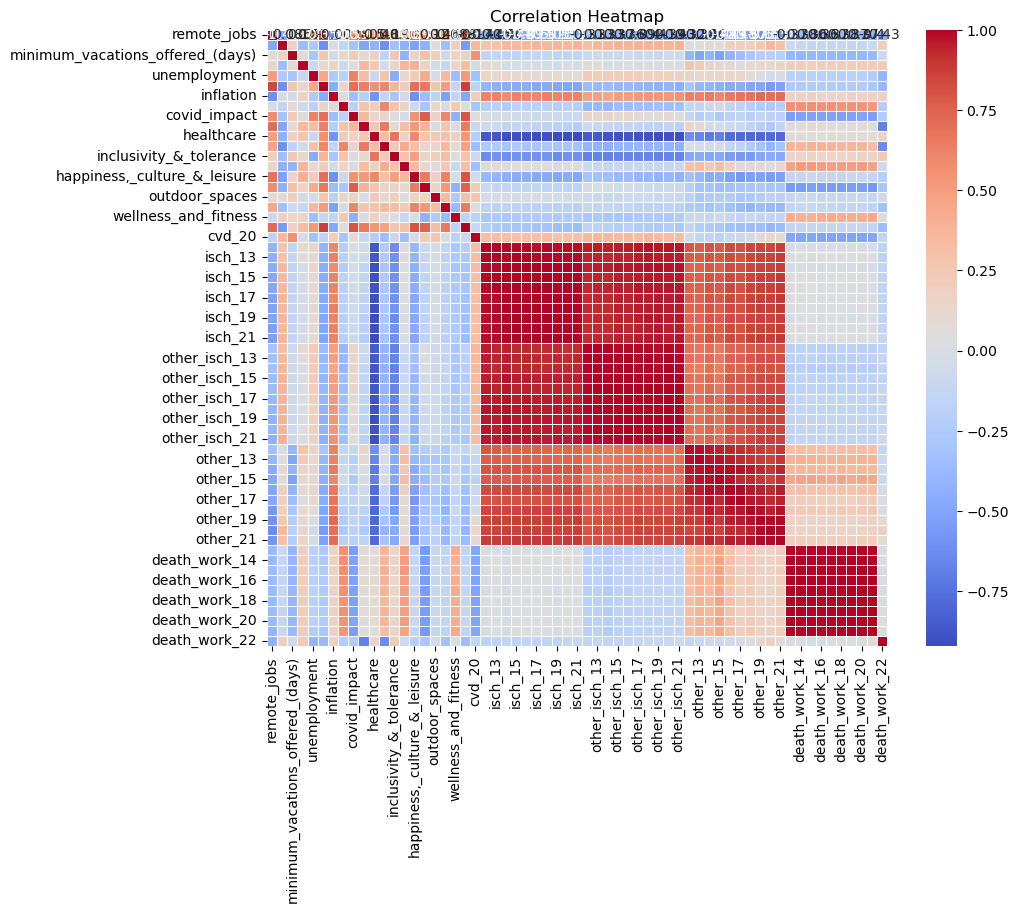

In [171]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Separate numeric and non-numeric columns
numeric_cols = wlb_heart_2.select_dtypes(include=[np.number]).columns
non_numeric_cols = wlb_heart_2.select_dtypes(exclude=[np.number]).columns

#fill null value
wlb_heart_2[numeric_cols] = wlb_heart_2[numeric_cols].fillna(wlb_heart_2[numeric_cols].mean())


# Round all numeric columns to one decimal place
wlb_heart_2 = wlb_heart_2.round(1)


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

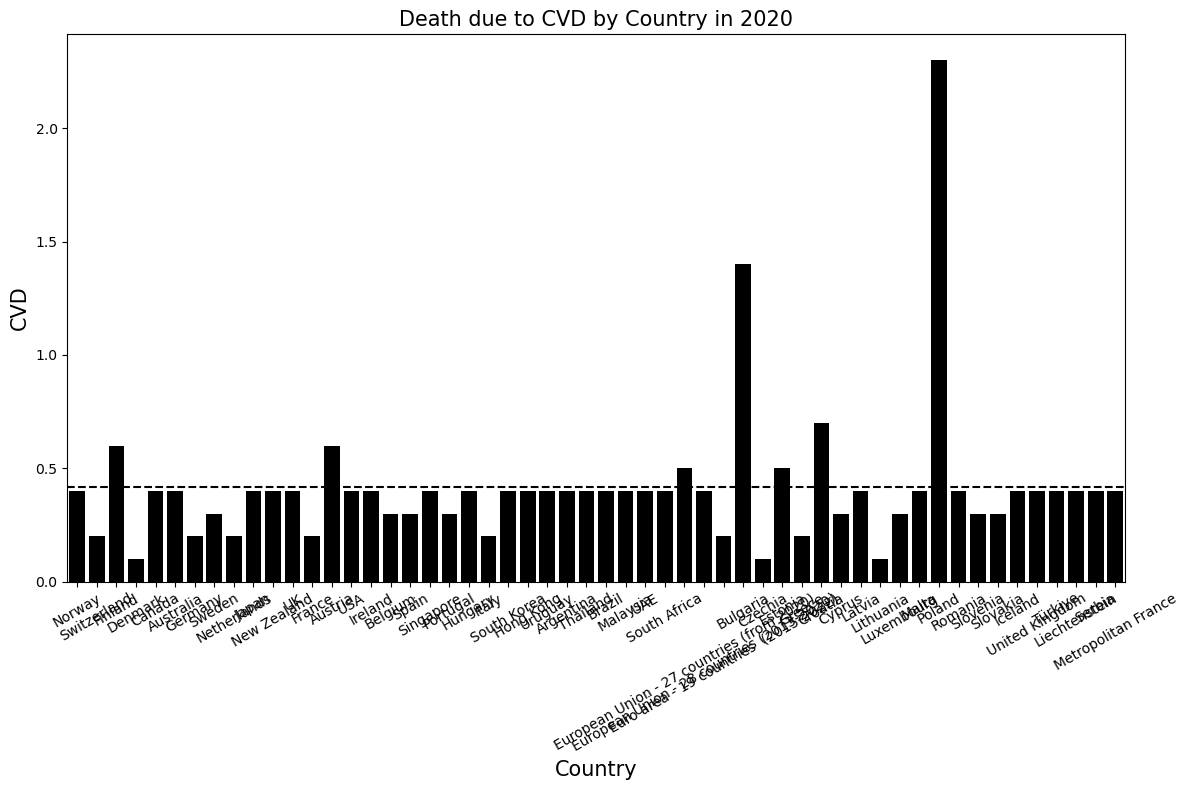

In [123]:
plt.figure(figsize=(12,8))
countries = sns.barplot(data= wlb_heart_2, x= 'country', y= 'cvd_20', color= 'black')


countries.axhline(mean_cvd, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

countries.set_title('Death due to CVD by Country in 2020', fontsize=15)
countries.set_xlabel('Country', fontsize= 15)
countries.set_ylabel( 'CVD', fontsize=15)

plt.xticks(rotation= 30)

plt.tight_layout()
plt.show

In [39]:
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

In [40]:
schema = 'cgn_analytics_24_2' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database



In [42]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'wlb_heart_2'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        wlb_heart_2.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The wlb_heart_2 table was imported successfully.
